In [39]:
import dask

import pandas as pd
import netCDF4

import xarray as xr
import numpy as np

import pandas as pd
import dask.array as da

import warnings
warnings.filterwarnings('ignore')
from datetime import date

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


print('loaded libraries')

loaded libraries


In [3]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws/"
ds = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc", chunks={'time':100})
ds_region = ds.sel(xh = slice(-138, 0), yh = slice(8, 49))
static = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.static.nc")
static_region = static.sel(xh = slice(-138, 0), yh = slice(8, 49))
#ds_static_region = xr.merge([static_region,ds_region])
ocetrac_labels = xr.open_mfdataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc", chunks={'time':1})

In [4]:
labels = ocetrac_labels['blobs']
#num_events = labels.attrs['final objects tracked']
#print(f"There are {num_events} total events tracked.")

In [5]:
reg_blobs = labels.sel(xh = slice(-138, 0), yh = slice(8, 49))

In [6]:
region_data = xr.merge([ds_region,reg_blobs],join='inner')

In [7]:
ds_static_region = xr.merge([static_region,region_data],join='inner')
ds_static_region

<xarray.Dataset>
Dimensions:       (yh: 193, xh: 547, yq: 1080, xq: 1440, nv: 2, time: 855)
Coordinates:
  * xh            (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 8.222 8.469 8.716 8.963 ... 48.59 48.76 48.92
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * nv            (nv) float64 1.0 2.0
  * time          (time) object 0186-05-03 12:00:00 ... 0190-10-20 12:00:00
Data variables: (12/33)
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    ...            ...
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(78,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(78,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(78,), meta=np.ndarray>
    time_bnds     (time, nv) object dask.array<chunksize=(78, 2), meta=np.ndarray>
    tos           (time, yh, xh) float32 dask.array<chunksize=(78, 193, 547), meta=np.ndarray>
    blobs         (time, yh, xh) float64 dask.array<chunksize=(1, 193, 547), meta=np.ndarray>
Attributes:
    external_variables:  areacello areacello

In [8]:
%%time
labels.compute();

CPU times: user 533 ms, sys: 722 ms, total: 1.26 s
Wall time: 1.65 s


In [9]:
np.unique(labels.sel(xh = slice(-138, 0), yh = slice(8, 49)))

array([  3.,   6.,  22.,  25.,  26.,  32.,  34.,  35.,  36.,  37.,  40.,
        41.,  42.,  45.,  48.,  49.,  50.,  51.,  55.,  56.,  58.,  69.,
        71.,  74.,  75.,  78.,  79.,  80.,  84.,  86.,  87.,  88.,  89.,
        90.,  91.,  94.,  98.,  99., 101., 103., 112., 113., 116., 118.,
       119., 120., 122., 127., 128., 130., 132., 133., 143., 145., 146.,
       148., 153., 156., 158., 159., 171., 184., 186., 189., 190., 194.,
       201., 202., 208., 212., 220., 221., 223., 224., 226., 227., 228.,
       231., 237., 242., 244., 246., 247., 249., 252., 256.,  nan])

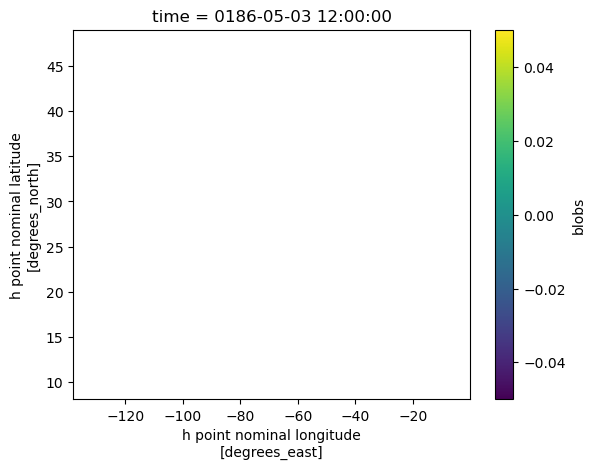

In [10]:
labels.isel(time=0).sel(xh = slice(-138, 0), yh = slice(8, 49)).plot()

In [88]:
#Region 1 (top left)
ids = np.unique(labels.sel(xh = slice(-138,-98), yh = slice(23, 42)))
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([ 22.,  26.,  41.,  45.,  50.,  55.,  56.,  80.,  84.,  87., 112.,
       120., 148., 153., 158., 159., 184., 221., 224., 227., 228., 246.])

In [93]:
#Region 2 (low left)
ids = np.unique(labels.sel(xh = slice(-138,-98), yh = slice(8, 23)))
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([  3.,   6.,  22.,  26.,  40.,  41.,  45.,  50.,  55.,  56.,  58.,
        75.,  80.,  84.,  87.,  89.,  94., 103., 112., 118., 120., 143.,
       146., 148., 153., 158., 159., 184., 201., 208., 221., 224., 226.,
       227., 228., 242., 246., 249.])

In [100]:
#Region 3 (low right)
ids = np.unique(labels.sel(xh = slice(-98,-70), yh = slice(8, 23)))
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([  3.,   6.,  25.,  26.,  32.,  35.,  37.,  40.,  42.,  48.,  49.,
        50.,  51.,  58.,  71.,  74.,  75.,  78.,  79.,  80.,  86.,  88.,
        89.,  90.,  91.,  94.,  98., 103., 112., 113., 116., 118., 119.,
       120., 122., 127., 128., 130., 132., 133., 143., 145., 146., 148.,
       156., 159., 171., 186., 189., 190., 194., 201., 202., 208., 212.,
       220., 223., 226., 228., 231., 237., 242., 244., 246., 247., 249.,
       252., 256.])

In [103]:
#Region 4 (top right)
ids = np.unique(labels.sel(xh = slice(-98,-70), yh = slice(23, 42)))
ids = np.array([id for id in ids if ~np.isnan(id)])
ids


array([ 25.,  32.,  34.,  35.,  36.,  37.,  42.,  69.,  71.,  78.,  79.,
        86.,  88.,  90., 113., 116., 132., 156., 186., 194., 212., 220.,
       223., 231., 237., 244., 247., 252.])

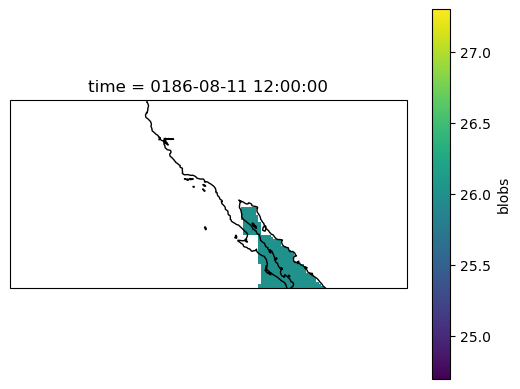

In [86]:
#Region 1 (top left)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#labels.isel(time=10).sel(xh = slice(-138, 0), yh = slice(8, 49)).plot()
labels.isel(time=100).sel(xh = slice(-138,-98), yh = slice(23, 42)).plot()
plt.show()

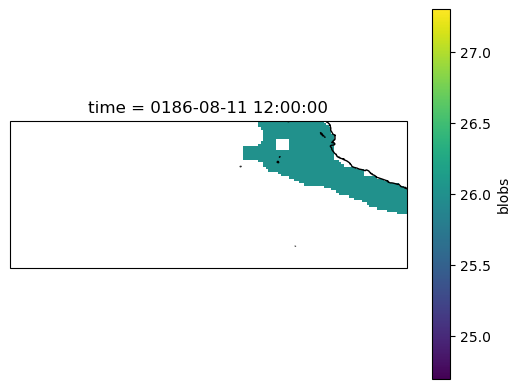

In [95]:
#Region 2 (low left)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#labels.isel(time=10).sel(xh = slice(-138, 0), yh = slice(8, 49)).plot()
labels.isel(time=100).sel(xh = slice(-138,-98), yh = slice(8, 23)).plot()
plt.show()

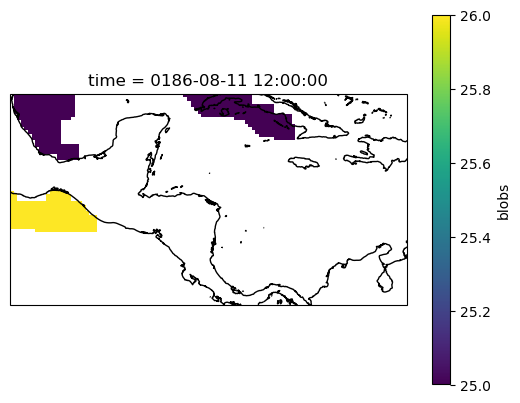

In [99]:
#Region 3 (low right)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#labels.isel(time=10).sel(xh = slice(-138, 0), yh = slice(8, 49)).plot()
labels.isel(time=100).sel(xh = slice(-98,-70), yh = slice(8, 23)).plot()
plt.show()

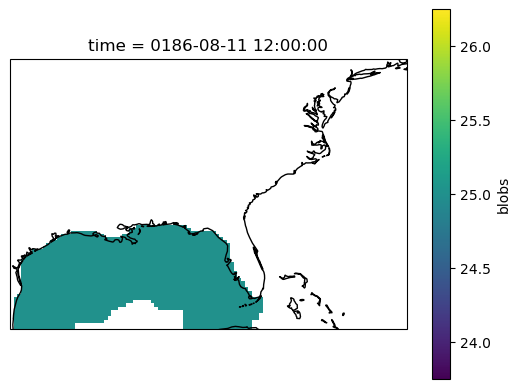

In [102]:
#Region 3 (top right)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#labels.isel(time=10).sel(xh = slice(-138, 0), yh = slice(8, 49)).plot()
labels.isel(time=100).sel(xh = slice(-98,-70), yh = slice(23, 42)).plot()
plt.show()

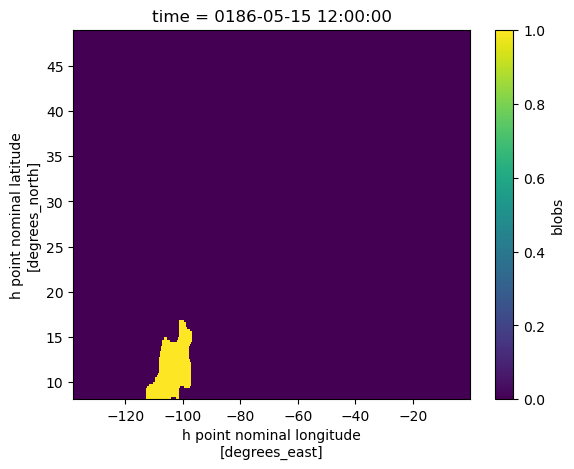

In [34]:
(labels.isel(time=12)==3).plot()